In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import networkx as nx
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

df_all = pd.read_csv("..//..//..//Database//network8_10//network_metrics_MTC.csv", index_col=0)
df_all_hour_nt = df_all[df_all['full_network'] == False]
df_all_full_nt = df_all[df_all['full_network'] == True]

In [76]:
df_all_hour_nt.index = df_all_full_nt.index
df_all_hour_nt

,degree,in_degree,out_degree,betweenness_centrality,closeness_centrality,katz_centrality,time,MTC,full_network
t0,33.0,0.0,33.0,0.000000,0.0,1.000,8-830am,23,False
t1,1.0,1.0,0.0,0.001122,0.0,1.100,8-830am,3,False
t2,2.0,2.0,0.0,0.005131,0.0,1.262,8-830am,1,False
t3,8.0,8.0,0.0,0.009091,0.0,1.810,8-830am,14,False
t4,26.0,0.0,26.0,0.000000,0.0,1.000,8-830am,9,False
...,...,...,...,...,...,...,...,...,...
t6816,9.0,9.0,0.0,0.006198,0.0,2.163,930-10am,13,False
t6817,6.0,6.0,0.0,0.002346,0.0,1.600,930-10am,8,False
t6818,9.0,9.0,0.0,0.006198,0.0,2.163,930-10am,1,False
t6819,2.0,2.0,0.0,0.000782,0.0,1.200,930-10am,1,False


# Ridge Regression

In [85]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score


In [92]:
reg = linear_model.LinearRegression()

# Split the data into training/testing sets
X = df_all_hour_nt.iloc[:, :6].values
y = df_all_hour_nt[['MTC']].values
# X = StandardScaler().fit_transform(X)
# y = StandardScaler().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Train the model using the training sets
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
reg.score(X_train, y_train)
reg.score(X_test, y_test)

# para = np.concatenate((reg.coef_, reg.intercept_.reshape(-1, 1)) , axis=1)
# print(para)
# np.savetxt("..//..//..//Database//prediction//ridge_reg.csv", para, delimiter=",")

# plt.scatter(X_test, y_test,  color='black')

Coefficients: 
 [[-6.00030288e-03 -8.49685830e-03  2.49655542e-03  1.54297892e+01
   3.77815850e-05 -3.67586735e-02]]
Mean squared error: 43.97
Coefficient of determination: -0.00


-0.0029985259685874066

# SVM

In [93]:
clf = svm.SVR(kernel = 'rbf')#.fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=5)
scores

c:\Users\Admin\anaconda3\envs\networkflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\anaconda3\envs\networkflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\anaconda3\envs\networkflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\anaconda3\envs\networkflow\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when 

array([-0.06741265, -0.09923363, -0.07559437, -0.02842278, -0.01991103])

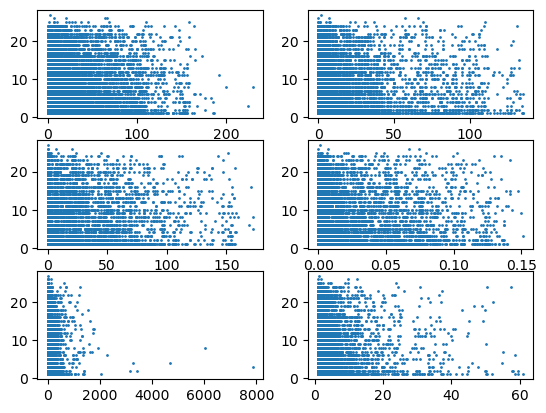

In [106]:
fig, ax = plt.subplots(3, 2)
ax = ax.ravel()
ax[0].scatter(X[:, 0], y, s = 1)
ax[1].scatter(X[:, 1], y, s = 1)
ax[2].scatter(X[:, 2], y, s = 1)
ax[3].scatter(X[:, 3], y, s = 1)
ax[4].scatter(X[:, 4], y, s = 1)
ax[5].scatter(X[:, 5], y, s = 1)


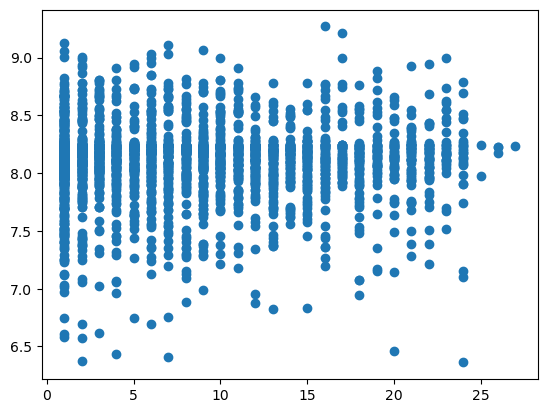

In [95]:
plt.scatter(y_test, y_pred)